<a href="https://colab.research.google.com/github/pkor725/Data-Science-independent-projects/blob/master/Copy_of_Copy_of_Master_Week_5_Core_Group_Project_World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness Report

## Requirement
1. Find and deal with outliers, anomalies, and missing data within the dataset.

2. Plot appropriate univariate and bivariate summaries recording our observations.

3. Implement the solution by performing hypothesis testing.


## 1.0 Import Libraries and Data

In [0]:
#Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #For z test Calculation
from statsmodels.stats import weightstats as stests #For z test calculation
# import pandas_profiling as pp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
#Increase number of rows and columns displayed
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
#Import data
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

## 2.0 Exploring the Data

### 2.1 Merging the Dataframes

In [0]:
#Checking that the columns are the same to merge the dataframes
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)
print(df_2018.columns)
print(df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'], dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'], dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'], dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'], dtype='object')
Index(['Overal

In [0]:
#Dropping unnecessary columns
df_2015.drop(columns=['Standard Error', 'Region', 'Dystopia Residual'], inplace=True)
df_2016.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Region', 'Dystopia Residual'], inplace=True)
df_2017.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], inplace=True)

In [0]:
#Changing the order of 2017 dataframe
df_2017 = df_2017[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity']]

In [0]:
#Adding a column with the year of data collection
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

In [0]:
df_2015 = df_2015[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)', 'Year']]
df_2016 = df_2016[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)', 'Year']]
df_2017 = df_2017[['Happiness.Rank', 'Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom','Generosity', 'Trust..Government.Corruption.', 'Year']]

In [0]:
df_2015.columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']
df_2016.columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']
df_2017.columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']

In [0]:
#Checking the column names
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)
print(df_2018.columns)
print(df_2019.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year'], dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year'], dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year'], dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year'], dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make lif

In [0]:
# Merging the data
df_all = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])
df_all.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


### 2.1 Data Understanding

In [0]:
#Check sample data
df_all.sample(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
93,94,Portugal,5.123,1.276070,0.943670,0.793630,0.447270,0.116910,0.015210,2016
6,7,Sweden,7.343,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000,2019
152,153,Benin,3.484,0.394990,0.104190,0.210280,0.397470,0.201800,0.066810,2016
53,54,Latvia,5.850,1.260749,1.404715,0.638567,0.325708,0.153075,0.073843,2017
143,144,Chad,3.763,0.422140,0.631780,0.038240,0.128070,0.186670,0.049520,2016
126,127,Congo (Kinshasa),4.418,0.094000,1.125000,0.357000,0.269000,0.212000,0.053000,2019
27,28,Qatar,6.611,1.690420,1.078600,0.797330,0.640400,0.325730,0.522080,2015
76,77,Kosovo,5.401,0.901450,0.660620,0.540000,0.143960,0.279920,0.065470,2016
20,21,Czech Republic,6.711,1.233000,1.489000,0.854000,0.543000,0.064000,0.034000,2018
15,16,Germany,6.951,1.487923,1.472520,0.798951,0.562511,0.336269,0.276732,2017


In [0]:
df_all.shape

(782, 10)

Dataset has 782 rows and 10 columns

In [0]:
#Explore the column data types
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
Overall rank                    782 non-null int64
Country or region               782 non-null object
Score                           782 non-null float64
GDP per capita                  782 non-null float64
Social support                  782 non-null float64
Healthy life expectancy         782 non-null float64
Freedom to make life choices    782 non-null float64
Generosity                      782 non-null float64
Perceptions of corruption       781 non-null float64
Year                            782 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


1 column is of string date type while rest are numeric.

In [0]:
#Check Null Columns
df_all.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
Year                            0
dtype: int64

We will replace the null record in the dataset with a mean value.

In [0]:
#Replacing missing values with mean
df_all['Perceptions of corruption'].fillna((df_all['Perceptions of corruption'].mean()), inplace=True)

In [0]:
#Drop Unnecesary columns
df = df_all[['Overall rank','Country or region','Score', 'GDP per capita', 'Perceptions of corruption']]

In [0]:
df

,Overall rank,Country or region,Score,GDP per capita,Perceptions of corruption
0,1,Switzerland,7.587,1.39651,0.41978
1,2,Iceland,7.561,1.30232,0.14145
2,3,Denmark,7.527,1.32548,0.48357
3,4,Norway,7.522,1.45900,0.36503
4,5,Canada,7.427,1.32629,0.32957
...,...,...,...,...,...
151,152,Rwanda,3.334,0.35900,0.41100
152,153,Tanzania,3.231,0.47600,0.14700
153,154,Afghanistan,3.203,0.35000,0.02500
154,155,Central African Republic,3.083,0.02600,0.03500


## 3.0 Exploratory Data Analysis

### 3.1 Univariate Analysis


a) Statistical Distribution


In [0]:
df.describe()

,Overall rank,Score,GDP per capita,Perceptions of corruption
count,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,0.125436
std,45.182384,1.127456,0.407340,0.105749
min,1.000000,2.693000,0.000000,0.000000
25%,40.000000,4.509750,0.606500,0.054250
50%,79.000000,5.322000,0.982205,0.091033
75%,118.000000,6.189500,1.236187,0.155861
max,158.000000,7.769000,2.096000,0.551910


In [0]:
# Detailed statistics including range, quartile, kurtosis and skewness
col_names = ['Score', 'GDP per capita','Perceptions of corruption','Overall rank']
for i, col_val in enumerate(col_names):
    print("Mean:", df[col_val].mean())
    print("Median:", df[col_val].median())
    print("Mode:", df[col_val].mode())
    print("SD:", df[col_val].std())
    print("Variance:", df[col_val].var())
    # print("Range:", col_val_max - col_val_min)
    print("Quartiles:", df[col_val].quantile([0.25,0.5,0.75]))
    print("Skewness:", df[col_val].skew())
    print("Kurtosis:", df[col_val].kurt())
    print("\n")

Mean: 5.379017902998665
Median: 5.322
Mode: 0    2.905
1    4.350
2    5.129
3    5.192
4    5.835
5    5.890
6    6.375
7    6.379
dtype: float64
SD: 1.127456460155013
Variance: 1.2711580695452724
Quartiles: 0.25    4.50975
0.50    5.32200
0.75    6.18950
Name: Score, dtype: float64
Skewness: 0.035859433273691114
Kurtosis: -0.7610545865625724


Mean: 0.9160474824829727
Median: 0.9822047088146211
Mode: 0    0.0
dtype: float64
SD: 0.40734013128981933
Variance: 0.16592598255920726
Quartiles: 0.25    0.606500
0.50    0.982205
0.75    1.236187
Name: GDP per capita, dtype: float64
Skewness: -0.3185805094075457
Kurtosis: -0.6927595053792621


Mean: 0.1254356135735872
Median: 0.0910329567193985
Mode: 0    0.082
dtype: float64
SD: 0.10574868165319608
Variance: 0.011182783671389009
Quartiles: 0.25    0.054250
0.50    0.091033
0.75    0.155861
Name: Perceptions of corruption, dtype: float64
Skewness: 1.521857819606574
Kurtosis: 1.8863463013154846


Mean: 78.69820971867007
Median: 79.0
Mode: 0   

b) Numerical variables Distribution

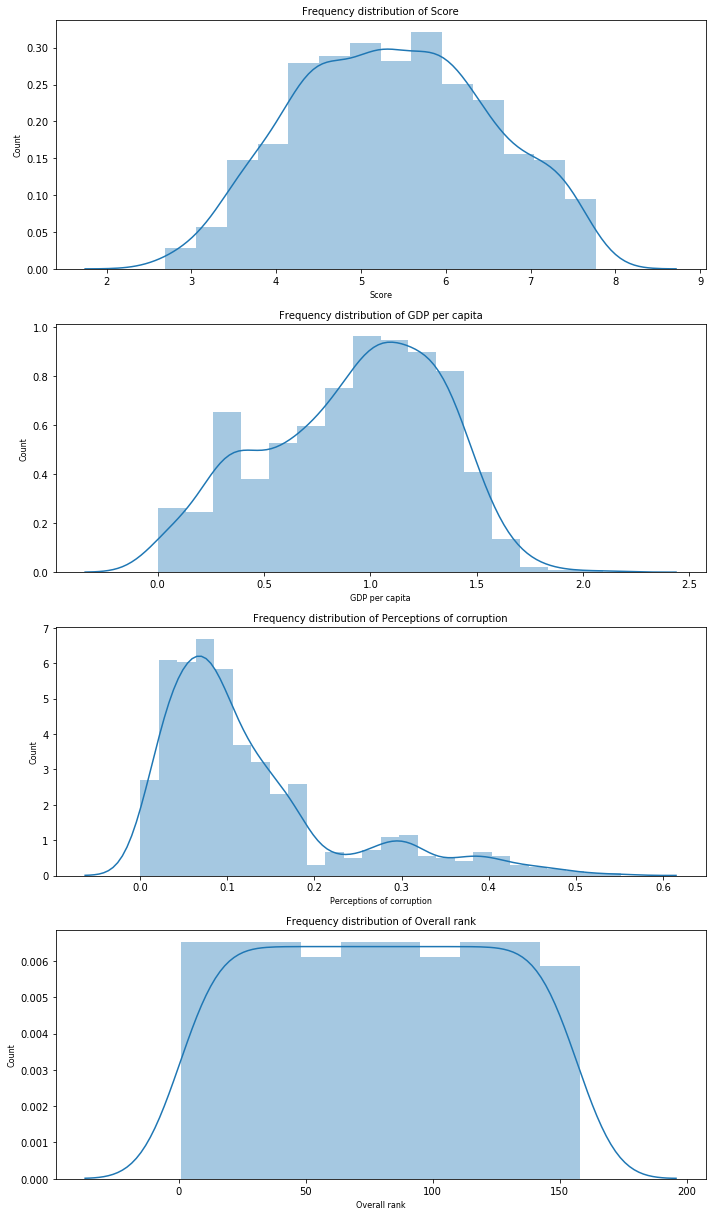

In [0]:
# Plotting distribution of numerical variables
col_names = ['Score', 'GDP per capita','Perceptions of corruption','Overall rank']
fig, ax = plt.subplots(len(col_names), figsize=(10,17))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

**Observations**
**a) Skewness**

1. Score and GDP per capita are fairly symetrical as they have skewness between 0 and 0.5

3. Perception of corruption is highly postively skewed.

**b) Kurtosis**
1. The distributions for all the variables are platkurtic as they have low kurtosis

Testing for Normality

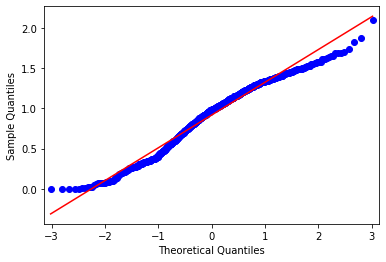

Statistics=0.9740, p=0.0000
Sample does not look Gaussian


In [0]:
#Q-Q Plot for GDP per capita
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df['GDP per capita'], line='s')
pyplot.show()
stat, p = shapiro(df['GDP per capita'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

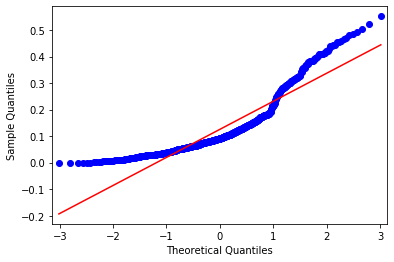

Statistics=0.8386, p=0.0000
Sample does not look Gaussian


In [0]:
#Q-Q Plot for Perceptions of corruption
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df['Perceptions of corruption'], line='s')
pyplot.show()
stat, p = shapiro(df['Perceptions of corruption'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

In [0]:
# Normalize perception of corruption
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
data = df['Perceptions of corruption'].reshape(-1, 1)
pt.fit(data)
transformed_data = pt.transform(data)


AttributeError: ignored

In [0]:
# normalize the data attributes
from sklearn import preprocessing
df1['Perceptions of corruption'] = preprocessing.normalize(df['Perceptions of corruption'])
df1['Perceptions of corruption']

ValueError: ignored

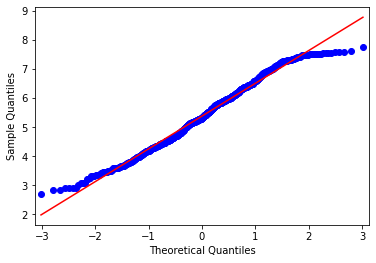

Statistics=0.9852, p=0.0000
Sample does not look Gaussian


In [0]:
#Q-Q Plot for Happiness Score
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df['Score'], line='s')
pyplot.show()
stat, p = shapiro(df['Score'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')


In [0]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import shapiro
pt = PowerTransformer()
pt.fit(df[['Perceptions of corruption']])
#applying power transform to the data
df['Perceptions of corruption'] = pt.fit(df[['Perceptions of corruption']])

stat, p = shapiro(df['Perceptions of corruption'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

TypeError: ignored

### 3.3 Checking outliers

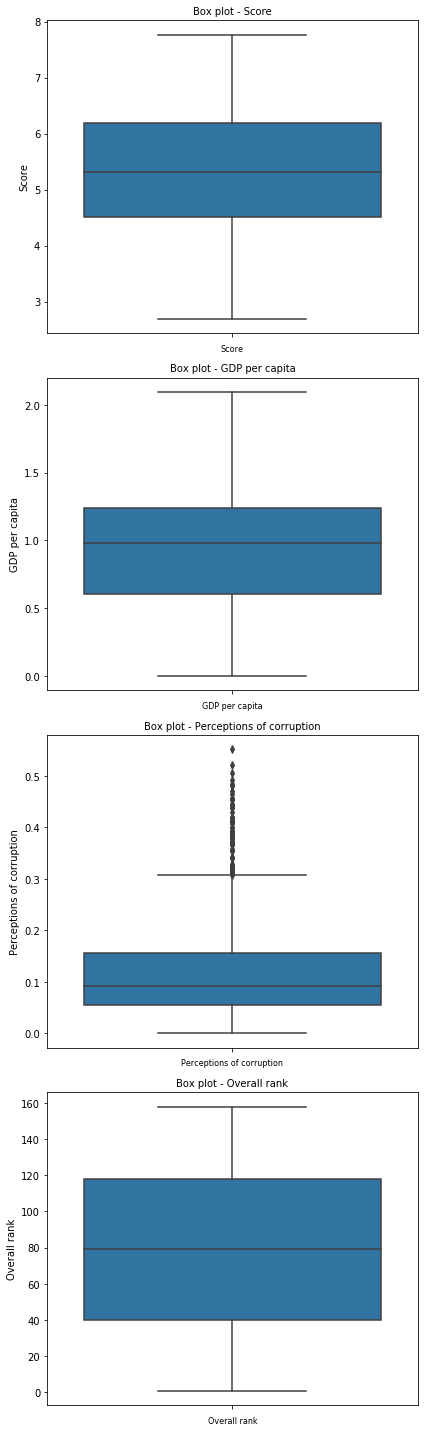

In [0]:
#Outlier: 
col_names = ['Score', 'GDP per capita','Perceptions of corruption','Overall rank']

fig, ax = plt.subplots(len(col_names), figsize=(6,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.tight_layout()
plt.show()

Observations:

a) Score and GDP per capita columns have no outliers

b) Perceptions of corruption has outliers. That notwithstanding, the outliers will not be dropped as they are of reasonable range compared to mean.


### 3.4 Bi-variate analysis

In [0]:
#Checking for correlations between the variables
plt.figure(dpi=100)
cor=df.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True)
plt.title('Correlation between variables')
plt.show

a) GDP versus happiness Score

In [0]:
#Scatter plot will check for any correlation between happiness score and GDP
plt.scatter(df['GDP per capita'], df['Score'] )

# Title
plt.title('GDP verses Happiness Score')

# X axis label
plt.xlabel('GDP per capita')

# y axis label
plt.ylabel('Score')

# Display scatterplot
plt.show()


Observations

* There is a strong positive corelation between the GDP per capita and the happiness score. i.e An increase in the GDP per capita has a direct positive effect on the happiness score.

 b) Perceptions on corruption versus happiness Score



In [0]:
#Scatter plot will check for any correlation between happiness score and GDP
plt.scatter(df['Perceptions of corruption'], df['Score'])

# Title
plt.title('Perceptions of corruption verses Happiness Score')

# X axis label
plt.xlabel('Perceptions of corruption')

# y axis label
plt.ylabel('Score')

# Display scatterplot
plt.show()

Observations

* There is a moderate positive corelation between the perception of corruption and the happiness score. An increase in corruption increases affects the happiness score.

c) GDP versus perceptions of corruption


In [0]:
#Scatter plot will check for any correlation between perceptions of corruption and GDP
plt.scatter(df['GDP per capita'], df['Perceptions of corruption'])

# Title
plt.title('GDP verses Perceptions on corruption')

# X axis label
plt.xlabel('GDP per capita)')

# y axis label
plt.ylabel('Perceptions of corruption')

# Display scatterplot
plt.show()


Observation

There is a weak positive corelation between the GDP per capita and perceptions of corruption. An increase in the GDP per capita slightly increases the perceptions of corruption.

## Feature Engineering

Create a new strata based on Happiness score.
This is to ensure all happiness scores are well represented in the sample

In [0]:
# Create strata based on happiness score.


In [0]:
#Procedure to assign strata based on Happiness score
def assign_strata():
# Create a list to store the data
    strata = []
    # For each row in the column,
    for score in df['Score']:
        if score >= 2 and score <= 3.5:
            strata.append(1)      
        elif score >= 3.5 and score <= 5.0:
            strata.append(2)
        elif score >= 5 and score <= 6.5:
            strata.append(3)
        elif score >= 6.5 and score <= 8:
            strata.append(4) 

 # Create a column from the list
    df['strata'] = strata

In [0]:
#Execute the procedure
assign_strata()

In [0]:
df.sample(5)

## Sampling

a) Stratified sampling to be used

In [0]:
#Distributions of records per strata
df['strata'].value_counts().sort_values()

b) Sampling approach

Stratified sampling to be applied where 33% of records will be selected from each strata

In [0]:
# Stratified sample
df_strat = df.groupby('strata', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.33))
print(df_strat.shape)
df_strat['strata'].value_counts().sort_values()

## Sampling Normality tests

a) Distribution per strata before sampling

In [0]:
# histogram plot of whole population per strata
plt.hist(df['strata'])
plt.xlabel("Strata")
plt.ylabel("Records Count")
plt.title("Records Count Per Strata for Whole Population")
plt.show()

b) Distribution per strata after sampling

In [0]:
#Distribution post sampling
plt.hist(df_strat['strata'])
plt.xlabel("Strata")
plt.ylabel("Records Count")
plt.title("Records Count Per Strata for Sample Population")
plt.show()

The distribution pattern before sampling and after sampling is similar hence sampling was well distributed across all strata.

## Hypothesis Testing

#### a) Hypothesis

#### Null Hypothesis :
Average number of cars returned in Paris over weekends is same as those returned in Seine Saint Denis.

#### Alternative Hypothesis: 
Average number of cars returned in Paris over weekends is not the same as those returned in Seine Saint Denis.

Ho :  μ of Paris = μ of Seine Saint Denis

Ha :  μ of Paris ≠ μ of Seine Saint Denis

So, the test is for two independent samples similar to what is specified here http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTest-Means-Proportions/BS704_HypothesisTest-Means-Proportions6.html


#### b) Significance Level

Significance level of to validate the hypothesis above is 0.05 

#### c) Test Statistic

In [0]:
print("n1 = Paris: ",df_bc_sample_ssd.shape)
print("n2 = Seine-Saint-Denis",df_bc_sample_paris.shape)

In [0]:
#Paris Distribution
df_bc_sample_paris['BlueCars_taken_sum'].hist()
plt.show()

Conclusion:

if n1 > 30 and n2 > 30
![image.png](attachment:image.png)

if n1 < 30 or n2 < 30
![image.png](attachment:image.png) where df =n1+n2-2.

Population is greater than 30 so Z statistic to be used

#### d) Z- score and P-Value Calculation

In [0]:
def calculate_zscore(sample1, sample2):
    ztest ,pval1 = stests.ztest(sample1, x2=sample2, value=0,alternative='two-sided')
    print(float(pval1))
    return (ztest ,pval1)
    
def hypothesis_eval(p_value,alpha):
  #P-value <= significance level (a) => Reject your null hypothesis in favor of your alternative hypothesis.  Your result is statistically significant.
  if p_value < alpha:
    result = "Reject the null hypothesis and conclude that the effect is statistically significant"
  else:
    #P-value > significance level (a) => Fail to reject your null hypothesis.  Your result is not statistically significant.
    result = "Fail to reject the null hypothesis"
  return result

def initialize_variables():
  HoP = 'mu for Paris is equal to Seine-Saint-Denis'
  HaP = 'mu for Paris is not equal to Seine-Saint-Denis'
  paris_bar = get_mean(df_bc_sample_paris['BlueCars_taken_sum']) # Paris Mean
  ssd_bar = get_mean(df_bc_sample_ssd['BlueCars_taken_sum']) # SSD Mean 
  paris_n =df_bc_sample_paris.shape[0]   #n1                          
  ssd_n =df_bc_sample_ssd.shape[0]  #n2
  paris_sigma = np.std(df_bc_sample_paris['BlueCars_taken_sum']) #Standard Deviation of paris
  ssd_sigma = np.std(df_bc_sample_ssd['BlueCars_taken_sum']) #Standard Deviation of ssd
  pop_sigma = 0
  alpha = 0.05
  return (HoP,HaP,paris_bar,ssd_bar, paris_n,ssd_n,paris_sigma,ssd_sigma,alpha)
  
#Function to calculate all
def calculate_all():
  HoP,HaP, x1bar,x2bar, paris_n,ssd_n,paris_sigma,ssd_sigma,alpha = initialize_variables()
  z_score , p_value = calculate_zscore(df_bc_sample_paris['BlueCars_taken_sum']
                                      ,df_bc_sample_ssd['BlueCars_taken_sum'])
  print("Z score" , z_score, " P value ", p_value )
  result = hypothesis_eval(p_value,alpha)
  print("Hypothesis: Null: ",HoP)
  print("Alternate:",HaP, ' Alpha ',alpha)
  print("Significance Level / Alpha is ",alpha)
  print("Paris Mean: ",x1bar, " SSD Mean :",x2bar )
  print('x_bar ', x1bar,  'ssd_n',ssd_n,'paris_sigma ',paris_sigma,' ssd_sigma ',ssd_sigma)
  print("Z score is", z_score,"P value is", p_value)
  print(result)

calculate_all()

Above calculation has Z score being too high which is likely to result to erroneous conclusion.
The z score is high because of outliers. Therebeing, will drop the outliers then re-calculate.

### Dropping outliers

a) Paris Dataset

In [0]:
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [0]:
#Sample with no outliers
df_out = remove_outlier(df_bc_strat,'BlueCars_taken_sum')
#SSD sample
df_out_out_ssd = df_out[ (df_out['strata']==5) & (df_out['day_type']=='weekend')]
df_out_out_ssd = df_out_out_ssd.copy()
#Paris Sample
df_out_out_paris = df_out[ (df_out['strata']==1) & (df_out['day_type']=='weekend')]
df_out_out_paris = df_out_out_paris.copy()

In [0]:
df_bc_sample_ssd.shape

In [0]:
#Calculate z score and pvalue
def initialize_variables():
  HoP = 'mu for Paris is equal to Seine-Saint-Denis'
  HaP = 'mu for Paris is not equal to Seine-Saint-Denis'
  paris_bar = get_mean(df_bc_sample_paris['BlueCars_taken_sum']) # Paris Mean
  ssd_bar = get_mean(df_bc_sample_ssd['BlueCars_taken_sum']) # SSD Mean 
  paris_n =df_out_out_ssd.shape[0]   #n1                          
  ssd_n =df_out_out_paris.shape[0]  #n2
  paris_sigma = np.std(df_out_out_ssd['BlueCars_taken_sum']) #Standard Deviation of paris
  ssd_sigma = np.std(df_out_out_paris['BlueCars_taken_sum']) #Standard Deviation of ssd
  pop_sigma = 0
  alpha = 0.05
  return (HoP,HaP,paris_bar,ssd_bar, paris_n,ssd_n,paris_sigma,ssd_sigma,alpha)
  
#Function to calculate all
def calculate_all():
  HoP,HaP, x1bar,x2bar, paris_n,ssd_n,paris_sigma,ssd_sigma,alpha = initialize_variables()
  z_score , p_value = calculate_zscore(df_out_out_ssd['BlueCars_taken_sum']
                                      ,df_out_out_paris['BlueCars_taken_sum'])
  print("Z score" , z_score, " P value ", p_value )
  result = hypothesis_eval(p_value,alpha)
  print("Hypothesis: Null: ",HoP)
  print("Alternate:",HaP, ' Alpha ',alpha)
  print("Significance Level / Alpha is ",alpha)
  print("Paris Mean: ",x1bar, " SSD Mean :",x2bar )
  print('x_bar ', x1bar,  'ssd_n',ssd_n,'paris_sigma ',paris_sigma,' ssd_sigma ',ssd_sigma)
  print("Z score is", z_score,"P value is", p_value)
  print(result)

calculate_all()

## Summary

Outcome: The Null that mean of paris is same as mean of Seine-Saint-Denis is rejected with a P-Value of 1.527956353696186e-11.

The average daily returned cars in Paris is 465 against that of Seine-Saint-Denisof 41.

Notably, this is after dropping of outliers. The outliers were dropped as data was not normally distributed which causes failure in usage of z test. It's proposed a further test mechanism is explored which includes the outliers. Dropping of may result to Type 1 error.
